<a href="https://colab.research.google.com/github/song-gif/DAP__/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##2021 월즈 플레이인 그룹 스테이지 데이터

In [97]:
# https://www.kaggle.com/braydenrogowski/league-of-legends-worlds-2021-playin-group-stats
# 몇 달 전에 있었던 온라인 게임 리그 오브 레전드의 플레이인 그룹 스테이지의 데이터셋이다.
# 220개의 행과 20개의 열이 존재하며
# 한 경기 당 10행, 총 22경기가 진행되었다.
pd.reset_option("max_rows")
df = pd.read_csv('/content/League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


##관심 없는 열 제거

In [98]:
# 사용하지 않을 열들을 제거
df = df.drop(['Opponent', 'Kill Participation','Dragons Against', 'Barons Against'], axis=1)
df

,Team,Player,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Barons For,Result
0,UOL,Boss,Top,Camille,4,5,3,188,11107,0.17,8,8,16,0,0,L
1,GS,Crazy,Top,Gwen,3,1,9,217,12201,0.20,10,7,17,4,1,W
2,UOL,Ahahacik,Jungle,Trundle,2,4,5,156,9048,0.15,8,14,22,0,0,L
3,GS,Mojito,Jungle,Talon,5,4,10,194,11234,0.23,12,8,20,4,1,W
4,UOL,Nomanz,Mid,Leblanc,1,3,4,216,9245,0.29,6,9,15,0,0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,Mid,Ryze,4,4,2,356,15558,0.23,24,6,30,4,1,W
216,UOL,Argonavt,Adc,Senna,1,3,9,58,9554,0.16,35,16,51,1,1,L
217,BYG,Doggo,Adc,Draven,10,2,4,353,20546,0.38,15,5,20,4,1,W
218,UOL,Santas,Support,Wukong,0,4,7,200,10354,0.11,16,8,24,1,1,L


##결측값 확인

In [90]:
# 데이터셋을 사용하기 전에 Missing Value가 있는지 확인
# 결측값 존재하지 않음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   220 non-null    object 
 1   Player                 220 non-null    object 
 2   Position               220 non-null    object 
 3   Champion               220 non-null    object 
 4   Kills                  220 non-null    int64  
 5   Deaths                 220 non-null    int64  
 6   Assists                220 non-null    int64  
 7   Creep Score            220 non-null    int64  
 8   Gold Earned            220 non-null    int64  
 9   Champion Damage Share  220 non-null    float64
 10  Wards Placed           220 non-null    int64  
 11  Wards Destroyed        220 non-null    int64  
 12  Ward Interactions      220 non-null    int64  
 13  Dragons For            220 non-null    int64  
 14  Barons For             220 non-null    int64  
 15  Result

##참가 선수 목록

In [99]:
# 2021 월즈 플레이인에 참가한 선수 목록
# 총 55명의 선수가 대회에 참가
players = df[['Player']]
players = players.drop_duplicates()
players = players.sort_values(by=['Player'] ,ascending=True)
p = players.reset_index(drop=True)
p.T   # 편한 스크롤을 위해 열과 행을 맞바꿈

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Player,Ackerman,Aegis,Ahahacik,Aladoric,Ale,Alive,Argonavt,Aria,Babip,Bapip,Blaber,Bolulu,Boss,Buggax,Bulcan,Chovy,Cody,Crazy,Deft,Doggo,Evi,Fudge,Gaeng,Grevthar,Guigo,Husha,Icon,Iwandy,Jojo,Kino,Leona,Liang,Light,Maoan,Mojito,Morgan,Nomanz,Perkz,Pk,Santas,Solidsnake,Steal,Tally,Tarzan,Titan,Violet,Vizicsacsi,Vsta,Vulcan,Whitelotus,Willer,Yutapon,Zergsting,Zersting,Zven


#이상값 확인
  위의 데이터프레임을 보다 보면 30번째 열의 값이 Leona로 되어있는데(선수 칸에 챔피언이 입력된 것 같은 모습), 아마 데이터를 입력하는 과정에서 실수가 있었던 것 같다. 아래를 계속 보다 보면 Zergsting 선수를 Zersting으로 잘못 입력한 것 같은 모습도 볼 수 있다.
  
  object값을 가진 데이터에 대해 이상값을 체크하고 발견했다면 고쳐준다.
  챔피언 = 캐릭터

In [92]:
# 팀 이름 이상값 확인
# 팀 이름엔 이상값이 관측되지 않음
# 총 10팀이 대회에 참가

pd.set_option("max_rows", None)

teams = df[['Team']]
teams = teams.sort_values(by=['Team'] ,ascending=True)
teams = teams['Team'].drop_duplicates()
teams = teams.reset_index(drop=True)
t = pd.DataFrame(teams)
t.T

,0,1,2,3,4,5,6,7,8,9
Team,BYG,C9,DFM,GS,HLE,INF,LNG,PCE,RED,UOL


In [100]:
# 출전 횟수를 통해 선수 이름의 이상값 확인(출전 횟수가 낮으면 오타의 가능성이 있음)
# Leona, Bulcan 등, 이상값으로 의심되는 값 발견
players = df[['Player']]
players = players.sort_values(by=['Player'])
p = pd.DataFrame(players['Player'].value_counts())
p.T  

,Nomanz,Aria,Maoan,Perkz,Gaeng,Steal,Blaber,Argonavt,Doggo,Kino,Santas,Zven,Boss,Ahahacik,Husha,Fudge,Evi,Yutapon,Willer,Ackerman,Guigo,Ale,Deft,Solidsnake,Violet,Light,Iwandy,Cody,Jojo,Aegis,Morgan,Alive,Vulcan,Chovy,Crazy,Tarzan,Aladoric,Bolulu,Liang,Mojito,Grevthar,Buggax,Whitelotus,Vizicsacsi,Titan,Tally,Icon,Zergsting,Babip,Vsta,Pk,Leona,Bapip,Bulcan,Zersting
Player,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,1,1,1,1,1


In [101]:
# 선수 이름에서 이상값 4개 방견
# Bulcan -> Vulcan, Leona-> Vsta, Zersting -> Zergsting, Bapip -> Babip
# 총 51명의 선수가 대회에 참가(55명 X)
df.loc[df['Player'] == 'Bulcan', 'Player'] = 'Vulcan'
df.loc[df['Player'] == 'Leona', 'Player'] = 'Vsta'
df.loc[df['Player'] == 'Zersting', 'Player'] = 'Zergsting'
df.loc[df['Player'] == 'Bapip', 'Player'] = 'Babip'

players = df[['Player']]
players = players.drop_duplicates()
players = players.sort_values(by=['Player'] ,ascending=True)
p = players.reset_index(drop=True)
p.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Player,Ackerman,Aegis,Ahahacik,Aladoric,Ale,Alive,Argonavt,Aria,Babip,Blaber,Bolulu,Boss,Buggax,Chovy,Cody,Crazy,Deft,Doggo,Evi,Fudge,Gaeng,Grevthar,Guigo,Husha,Icon,Iwandy,Jojo,Kino,Liang,Light,Maoan,Mojito,Morgan,Nomanz,Perkz,Pk,Santas,Solidsnake,Steal,Tally,Tarzan,Titan,Violet,Vizicsacsi,Vsta,Vulcan,Whitelotus,Willer,Yutapon,Zergsting,Zven


In [102]:
# 이름을 기준으로 한 정렬을 통해 챔피언 이름 이상값 확인
# 챔피언 이름에도 이상값 방견되지 않음
# 총 67개의 챔피언이 대회에 사용됨
pd.set_option("max_rows", None)
champions = df[['Champion']]
champions = champions.sort_values(by=['Champion'] ,ascending=True)
champions = champions['Champion'].drop_duplicates()
champions = champions.reset_index(drop=True)
c = pd.DataFrame(champions)
c.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
Champion,Aatrox,Akali,Alistar,Amumu,Aphelios,Azir,Bard,Braum,Camille,Draven,Ezreal,Fiora,Galio,Gangplank,Gnar,Gragas,Graves,Gwen,Irelia,Jarvan,Jax,Jayce,Jhin,Kaisa,Kalista,Karma,Kennen,Leblanc,Lee Sin,Leona,Lillia,Lissandra,Lucian,Lulu,Malphite,Miss Fortune,Nami,Nautilus,Nocturn,Olaf,Orianna,Qiyana,Rakan,Rell,Renekton,Ryze,Sejuani,Senna,Sett,Sion,Sylas,Syndra,Tahm Kench,Taliyah,Talon,Thresh,Tristana,Trundle,Tryndamere,Twisted Fate,Urgot,Wukong,Xayah,Xin Zhao,Yone,Zed,Zoe


In [103]:
# 승패의 횟수를 통해 이상값 관측
# 승패 모두 220의 반인 110을 값으로 가졌기에 이상값 없음
results = df[['Result']]
results = results.sort_values(by=['Result'] ,ascending=True)
r = pd.DataFrame(results['Result'].value_counts())
r.T  

,L,W
Result,110,110


##흥밋거리 데이터

*   대회에서 라인 별로 가장 픽이 많이 되었던 챔피언(캐릭터)





In [135]:
cham_pos = df[['Champion', 'Position']]
cham_pos = cham_pos.sort_values(by=['Champion'] ,ascending=True)

hot_champ = pd.DataFrame()

hot_top = cham_pos[cham_pos['Position'] == 'Top']
hot_top = pd.DataFrame(hot_top['Champion'].value_counts())[0:1]
hot_champ = pd.concat([hot_champ, hot_top])

hot_jg = cham_pos[cham_pos['Position'] == 'Jungle']
hot_jg = pd.DataFrame(hot_jg['Champion'].value_counts())[0:1]
hot_champ = pd.concat([hot_champ, hot_jg])

hot_mid = cham_pos[cham_pos['Position'] == 'Mid']
hot_mid = pd.DataFrame(hot_mid['Champion'].value_counts())[0:1]
hot_champ = pd.concat([hot_champ, hot_mid])

hot_ad = cham_pos[cham_pos['Position'] == 'Adc']
hot_ad = pd.DataFrame(hot_ad['Champion'].value_counts())[0:1]
hot_champ = pd.concat([hot_champ, hot_ad])

hot_sup = cham_pos[cham_pos['Position'] == 'Support']
hot_sup = pd.DataFrame(hot_sup['Champion'].value_counts())[0:1]
hot_champ = pd.concat([hot_champ, hot_sup])

hot_champ= hot_champ.rename({'Champion': 'Time'}, axis=1)
hot_champ['Champion'] = hot_champ.index
hot_champ = hot_champ.rename({'Jayce': 'Top', 'Xin Zhao': 'Jungle', 'Sylas': 'Mid', 'Miss Fortune': 'Adc', 'Leona': 'Support'}, axis=0)
hot_champ = hot_champ[['Champion', 'Time']]
hot_champ

,Champion,Time
Top,Jayce,9
Jungle,Xin Zhao,12
Mid,Sylas,9
Adc,Miss Fortune,18
Support,Leona,13




*   플레이인 스테이지 동안 출현한 원소 드래곤의 빈도 수




([<matplotlib.axis.XTick at 0x7f3ba2c02710>,
 [Text(0, 0, 'cloud'),
  Text(0, 0, 'infernal'),
  Text(0, 0, 'mountain'),
  Text(0, 0, 'ocean')])

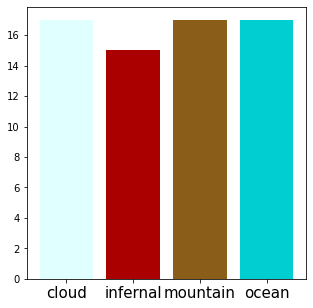

In [137]:
# 리그 오브 레전드에는 4가지의 원소 용이 있으며 
# 세 번째 용이 등장할 때까지는 기존에 나오지 않은 용이 나오고 
# 그 다음부터는 세 번째 때 나온 용이 계속 나오게 된다.
# 아래는 유튜브를 통해 원소별 드래곤 출현 정보를 직접 입력한 데이터다
# https://cleancode-ws.tistory.com/65 참조
drake_df = pd.DataFrame(['Mountain', 'Infernal', 'Ocean', 'Infernal', 'Ocean', 
                          'Cloud', 'Ocean', 'Cloud', 'Infernal', 'Mountain',
                          'Infernal', 'Ocean', 'Cloud', 'Ocean', 'Mountain',
                          'Infernal', 'Mountain', 'Cloud', 'Mountain', 'Cloud',
                          'Infernal', 'Cloud', 'Mountain', 'Ocean', 'Cloud',
                          'Ocean', 'Mountain', 'Infernal', 'Cloud', 'Mountain',
                          'Mountain', 'Ocean', 'Cloud', 'Cloud', 'Ocean',
                          'Infernal', 'Mountain', 'Ocean', 'Infernal', 'Cloud',
                          'Ocean', 'Mountain', 'Mountain', 'Cloud', 'Infernal',
                          'Mountain', 'Ocean', 'Infernal', 'Ocean', 'Mountain',
                          'Infernal', 'Ocean', 'Cloud', 'Infernal', 'Ocean',
                          'Cloud', 'Infernal', 'Cloud', 'Ocean', 'Mountain',
                          'Mountain', 'Ocean', 'Cloud', 'Cloud', 'Mountain', 
                          'Infernal'], columns=['element'])

cloud = drake_df[drake_df['element'] == 'Cloud'].value_counts()
infernal = drake_df[drake_df['element'] == 'Infernal'].value_counts()
mountain = drake_df[drake_df['element'] == 'Mountain'].value_counts()
ocean = drake_df[drake_df['element'] == 'Ocean'].value_counts()

plt.figure(figsize=(5,5))
plt.bar(1, cloud, color='#e0ffff', width=0.08)
plt.bar(1.1, infernal, color='#aa0000', width=0.08)
plt.bar(1.2, mountain, color='#8a5d19', width=0.08)
plt.bar(1.3, ocean, color='#00ced1', width=0.08)
ticklabel=['cloud','infernal','mountain','ocean']
plt.xticks([1, 1.1, 1.2, 1.3],ticklabel,fontsize=15,rotation=0)
# 바람용 17번, 화염용 15번, 대지용 17번, 바다용 17번으로 비슷비슷하게 등장했다. 

## 선수별 cs 비교

Text(0, 0.5, 'Player')

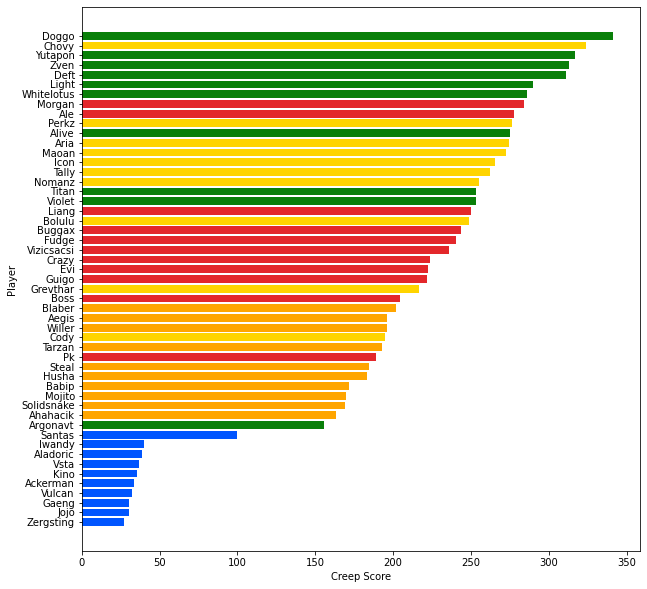

In [138]:
# 플레이인 스테이지 동안 선수마다 먹은 cs의 평균값  
# https://zephyrus1111.tistory.com/9 참조                   
mean_df = df.groupby('Player').mean()
mean_df = mean_df.reset_index()
cs_df = mean_df.sort_values(by=['Creep Score'], axis=0, ascending=True)
cs_df_player_list =  cs_df['Player']

top = df[df['Position'] == 'Top'].drop_duplicates(['Player'])
top = top['Player']
top_list = top.tolist()
jg = df[df['Position'] == 'Jungle'].drop_duplicates(['Player'])
jg = jg['Player']
jg_list = jg.tolist()
mid = df[df['Position'] == 'Mid'].drop_duplicates(['Player'])
mid = mid['Player']
mid_list = mid.tolist()
ad = df[df['Position'] == 'Adc'].drop_duplicates(['Player'])
ad = ad['Player']
ad_list = ad.tolist()
sup = df[df['Position'] == 'Sup'].drop_duplicates(['Player'])
sup = sup['Player']
sup_list = sup.tolist()

# 선수가 속한 라인에 따라 색을 다르게 표현
# 탑 정글 미드 원딜 서폿 순으로 빨주노초파
cs_colors = []
for p in cs_df_player_list:
  if p in top_list:
    cs_colors.append('#e3272b')
  elif p in jg_list:
    cs_colors.append('#ffa500')
  elif p in mid_list:
    cs_colors.append('#ffd400')
  elif p in ad_list:
    cs_colors.append('#097f09')
  else:
    cs_colors.append('#0055ff') 

plt.figure(figsize=(10,10))
plt.barh(cs_df['Player'], cs_df['Creep Score'],color = cs_colors)
plt.xlabel('Creep Score')
plt.ylabel('Player')

# 아래의 그래프를 보면 대체적으로 같은 라인끼리 뭉쳐있는 경향을 볼 수 있다.
# 또한 서폿의 경우, 미니언을 먹지 않아(타곤산 제외)
# cs 수치가 오로지 와드 파괴로만 오르기 떄문에 하위권에 나란히 있는 것을 볼 수 있다.

In [139]:
# 그래프를 자세히 보면 이상한 점을 발견할 수 있다.
# Argonavt 선수의 cs가 다른 원딜에 비해 cs를 이상하리만큼 적은 것과
# Santas 선수의 cs가 다른 서폿에 비해 이상하리만큼 높은 것이다.
# 이를 통해, 혹시 둘이 같은 팀 선수이고, cs를 원딜이 먹지 않고 서폿이 먹는
# 세나+@ 조합을 사용하지 않았나 생각해볼 수 있다.

argonavt = df[(df['Player'] == 'Argonavt') & (df['Champion'] == 'Senna')]
santas = df[(df['Player'] == 'Santas') & (df['Creep Score'] > 50)]
argo_san = pd.concat([argonavt, santas])
argo_san = argo_san[['Team', 'Player', 'Position', 'Champion', 'Creep Score']]
argo_san
# 확인 결과 두 선수 모두 UOL 소속이며, 다섯 경기 중 세나+@ 조합을 두 번 사용했다

,Team,Player,Position,Champion,Creep Score
167,UOL,Argonavt,Adc,Senna,50
216,UOL,Argonavt,Adc,Senna,58
169,UOL,Santas,Support,Sion,184
218,UOL,Santas,Support,Wukong,200


##라인 별 데미지 기여도

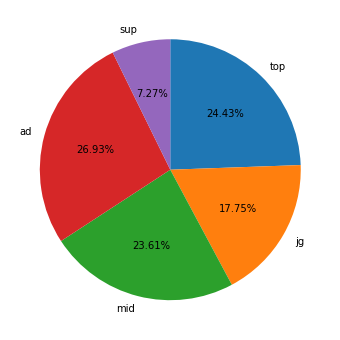

In [140]:
# 리그 오브 레전드에서는 라인전, 교전, 한타 등 많은 상황에서 딜교환이 이루어진다.
# 아래의 파이 그래프는 10개의 모든 팀을 라인 별로 묶은 뒤 상대에게 준 데미지 비율을 평균 내어 나타는 그래프이다.
top_df = df[df['Position'] == 'Top']
jg_df= df[df['Position'] == 'Jungle']
mid_df = df[df['Position'] == 'Mid']
ad_df = df[df['Position'] == 'Adc']
sup_df = df[df['Position'] == 'Support']

top_damage_share = top_df['Champion Damage Share'].mean()
jg_damage_share = jg_df['Champion Damage Share'].mean()
mid_damage_share = mid_df['Champion Damage Share'].mean()
ad_damage_share = ad_df['Champion Damage Share'].mean()
sup_damage_share = sup_df['Champion Damage Share'].mean()

lane = ['top', 'jg', 'mid', 'ad', 'sup']
damage_share = [top_damage_share, jg_damage_share, mid_damage_share, ad_damage_share, sup_damage_share]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(damage_share, labels = ['top', 'jg', 'mid', 'ad', 'sup'], autopct='%1.2f%%', counterclock=False, startangle=90)
plt.show()

# 누구나 예상하는 것처럼 서폿이 가장 적은 딜 비율을 갖고 있고 그 앞을 정글이 이었다.
# 신기하게 원딜이 진, 미포 메타였음에도 불구하고 원딜의 딜 비율이 가장 높았다.

## 승리와 각 속성 간의 상관관계

In [142]:
# 게임에서 킬을 내면 이기기 쉬워지고 반대로 킬을 당하면 이기기 어려워진다.
# 그렇다고 킬을 냈다고 무조건 이기는 것도, 킬을 당했다고 무조건 지는 것도 아니다.
# 게임의 승패에 영향을 주는 요소는 킬 말고도 여러가지가 있는데,
# 그 중에서 몇 가지 요소를 뽑아 게임의 승패에 얼마나 영향을 주는지 알아보자

from sklearn.preprocessing import LabelEncoder
df['Win'] = LabelEncoder().fit_transform(df['Result'])

rel_df = pd.DataFrame()
i = 0
while i <= 210:
  piece = df[i:i+10:2]
  piece_mean = piece.mean()
  piece_df = piece_mean.to_frame().T
  rel_df = pd.concat([rel_df, piece_df])

  piece = df[i+1:i+11:2]
  piece_mean = piece.mean()
  piece_df = piece_mean.to_frame().T
  rel_df = pd.concat([rel_df, piece_df])
  i += 10
rel_df = rel_df.drop(['Champion Damage Share', 'Ward Interactions'], axis=1)

rel= rel_df.corr()
rel = rel[['Win']]
rel = rel.sort_values(by='Win', ascending=False)
rel = rel.drop(['Win'])
rel 

# 킬이 게임의 승리에 가장 많이 기여한다.
# 죽지 않는 것이 킬만큼 중요하다.
# 와드를 설치해 맵에 시야를 확보하는 것보다 와드를 파괴해 상대방의 시야를 가리는 것이 더 중요하다.
# cs는 골드에 영향을 주지만, 골드를 얻는 데에는 킬, 어시, 오브젝트, 포탑 골드, 현상금 등, 여러가지가 있기 떄문에 승리와의 상관관계에 둘에 차이가 있다.

,Win
Kills,0.826406
Assists,0.726595
Barons For,0.693375
Dragons For,0.626411
Gold Earned,0.550869
Creep Score,0.256526
Wards Destroyed,0.249137
Wards Placed,0.060879
Deaths,-0.829448
